# Superdense Coding

This is an algorithm which transfers two classical bits of data using transfer of a single qubit from the sender(say Alice) to reciever(say Bob), provided they start off with an entangled pair of qubits.

In [1]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram,plot_state_qsphere, plot_bloch_multivector, plot_state_city

Let $q_0$ be Alice's qubit and $q_1$ Bob's. First let us generate the entangled pair $\frac{|00 \rangle +|11 \rangle}{\sqrt{2}}$ of qubits for Alice and Bob with the following circuit.

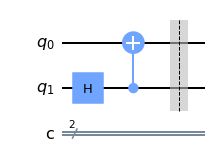

In [2]:
circ = QuantumCircuit(2,2)
circ.h(1)
circ.cx(1,0)
circ.barrier()
circ.draw('mpl')

Now we give the desired bits to be transferred as input (is known to Alice).

In [3]:
str = input('Two bit string to be communicated:')

Two bit string to be communicated:10


Now if the MSB is 1, then Alice passes her qubit through an X gate. Next, if the LSB is 1 she passes it through a Z gate. In our case the string is 10 so she passes it through the X gate alone. Next, Alice sends her qubit to Bob and Bob applies the gates and measurements shown after the second barrier (see circuit below) to obtain the two classical bits that Alice had. Thus two classical bits have been communicated by means of a single messenger qubit.

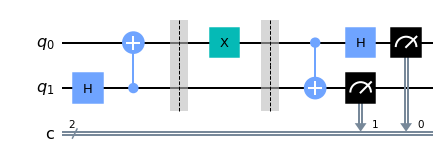

In [4]:
if(str == '10'):
    circ.x(0)
if(str == '01'):
    circ.z(0)
if(str == '11'):
    circ.x(0)
    circ.z(0)
circ.barrier()
circ.cx(0,1)
circ.h(0)
circ.measure([0,1],[0,1])
circ.draw('mpl')

A simulation of this has been run below and as desired the bits recieved by Bob are 10 as shown in histogram.

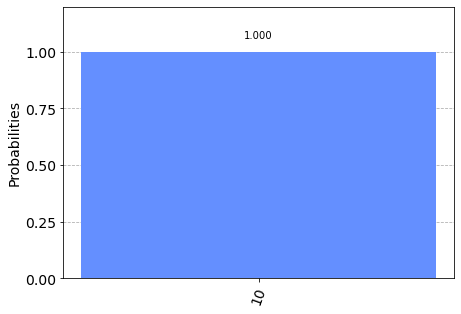

In [5]:
sim = Aer.get_backend('qasm_simulator')
job = execute(circ,sim,shots=1)
result = job.result()
count = result.get_counts()

plot_histogram(count)

Thus the algorithm has passed the test case.